In [1]:
# import libraries
import pandas as pd
import sklearn
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from scipy import stats
import seaborn as sns

In [2]:
# load data
crime_df = pd.read_excel("Crime_table.xls")
#show the first 5
crime_df.head()

,City,Population,Violent crime,Murder and nonnegligent manslaughter,Rape (revised definition)1,Rape (legacy definition)2,Robbery,Aggravated assault,Property crime,Burglary,Larceny- theft,Motor vehicle theft,Arson3
0,Adams Village,1861,0,0,NaN,0,0,0,12,2,10,0,0.0
1,Addison Town and Village,2577,3,0,NaN,0,0,3,24,3,20,1,0.0
2,Akron Village,2846,3,0,NaN,0,0,3,16,1,15,0,0.0
3,Albany,97956,791,8,NaN,30,227,526,4090,705,3243,142,NaN
4,Albion Village,6388,23,0,NaN,3,4,16,223,53,165,5,NaN


In [3]:
# create new df with the desired coulmns and change their name
df = crime_df[['Population', 'Murder and\nnonnegligent\nmanslaughter', 'Robbery']]
df.columns = ['Population', 'Murder', 'Robbery']

In [4]:
# find outlires in population
population_outlier = (df['Population'].std() * 3) + df['Population'].mean()

# remove outliers from population
i = 0
for p in df['Population']:
    if(p > population_outlier or p < -population_outlier):
        df = df.drop(df.index[i])
    i += 1

In [5]:
# find outlires in property crime
crime_outlier = (crime_df['Property\ncrime'].std() * 3) + crime_df['Property\ncrime'].mean()

# remove outliers from property crime
i = 0
for p in crime_df['Property\ncrime']:
    if(p > crime_outlier or p < -crime_outlier):
        df = df.drop(df.index[i])
    i += 1

In [6]:
# list of the population squared
pp_sqrd = []
for pp in df.Population:
     pp_sqrd.append(pp*pp)

# add the population squared to the df and show it
df.insert(1, 'Population_sqrd', pp_sqrd, True)
df.head()

,Population,Population_sqrd,Murder,Robbery
0,1861,3463321,0,0
1,2577,6640929,0,0
2,2846,8099716,0,0
3,97956,9595377936,8,227
4,6388,40806544,0,4


In [7]:
# check how many null values exists
print("is null\n", df.isnull().sum())
print("\nis na\n", df.isna().sum())

is null
 Population         0
Population_sqrd    0
Murder             0
Robbery            0
dtype: int64

is na
 Population         0
Population_sqrd    0
Murder             0
Robbery            0
dtype: int64


In [8]:
# rest indexes after removing rows
df = df.reset_index(drop=True)

In [9]:
# make murder and robbery categorical (0 or 1)
for i in range(2,4):
    for y in range(len(df)):
        if df.loc[y][i] > 0:
            df.loc[y][i] = 1
        else:
            df.loc[y][i] = 0
        
df.head()

,Population,Population_sqrd,Murder,Robbery
0,1861,3463321,0,0
1,2577,6640929,0,0
2,2846,8099716,0,0
3,97956,9595377936,1,1
4,6388,40806544,0,1


In [10]:
# add property crime in position 0 (our desired prediction)
df.insert(0, 'Property_crime', crime_df['Property\ncrime'], True)

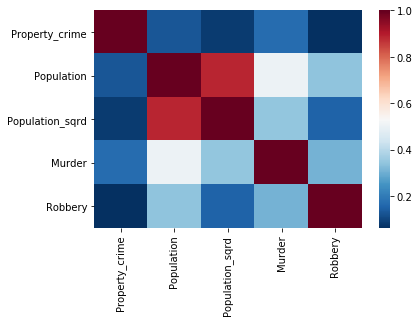

In [11]:
# # check their correlation (should be minimal)
correlation = df.corr()
# print(correlation)

# see in heatmap 
sns.heatmap(correlation, cmap="RdBu_r")

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


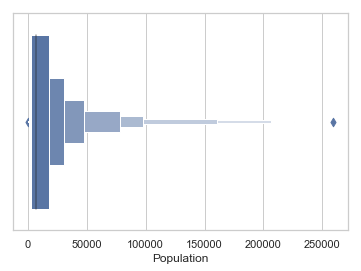

In [12]:
# box plot of the population
sns.set(style="whitegrid")
sns.boxenplot(x=df.Population)

In [13]:
# dataframes with dependent and independent variables
x = df[['Population', 'Population_sqrd', 'Murder', 'Robbery']]
y = df['Property_crime']

In [14]:
# Instantiate linear regession model
regr = linear_model.LinearRegression()

# use the model
regr.fit(x, y)

# see the coefficients
print("The coefficients are\n", regr.coef_)

# the intercept
print("The intercept is\n", regr.intercept_)

# r^2 value
print('\nR-squared\n', regr.score(x, y))

The coefficients are
 [ 4.76729899e-02 -1.62220773e-07  2.83034420e+03 -2.96666580e+02]
The intercept is
 -26.99000680034169

R-squared
 0.0334482163556562


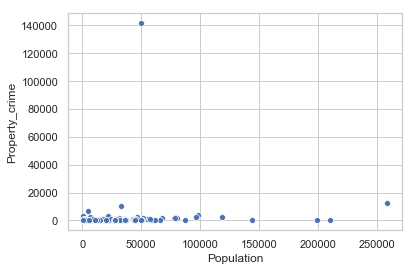

In [15]:
# Look into the variables
sns.scatterplot(x=x['Population'], y=y)

It seems that only one value is far away from all the rest. Even though it is not considered as an outlier (3 * std + mean), I will still remove the row with this value.

In [16]:
# Remove the row with values larger than 10K in the property crime column
df = df.drop(df[df.Property_crime > 10000].index)

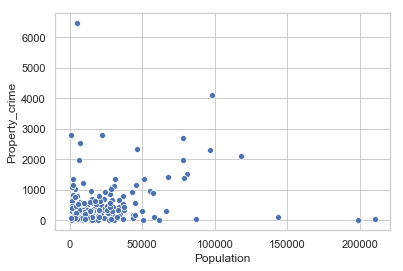

In [17]:
# reassign x and y
x = df[['Population', 'Population_sqrd', 'Murder', 'Robbery']]
y = df['Property_crime']

# scatter plot
sns.scatterplot(x=x['Population'], y=y)

It doesn't look like there is a linear relationship, but I'll test it anyway.

In [18]:
# run linear regression again
regr = linear_model.LinearRegression()
regr.fit(x, y)

# r^2 value
print('\nR-squared\n', regr.score(x, y))


R-squared
 0.16814673840598093


In [19]:
# Add a few more features to try and improve the relationship
df.insert(5, 'Burglary', crime_df['Burglary'], True)
df.insert(6, 'Assault', crime_df['Aggravated\nassault'], True)
df.insert(7, 'Larceny_theft', crime_df['Larceny-\ntheft'], True)

df.head()

,Property_crime,Population,Population_sqrd,Murder,Robbery,Burglary,Assault,Larceny_theft
0,12,1861,3463321,0,0,2,0,10
1,24,2577,6640929,0,0,3,3,20
2,16,2846,8099716,0,0,1,3,15
3,4090,97956,9595377936,1,1,705,526,3243
4,223,6388,40806544,0,1,53,16,165


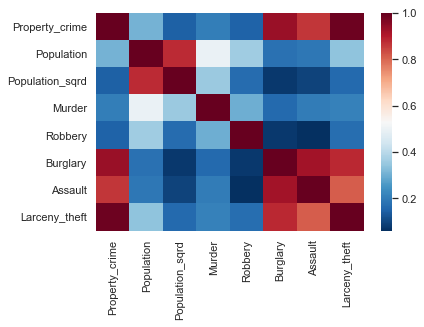

In [20]:
# check their correlations
correlation = df.corr()

# heatmap 
sns.heatmap(correlation, cmap="RdBu_r")

The three new features (Burglary, Assault, Larceny_theft) seem very correlated to property crime, but also between themselves. Therefore, I will only add 'assault' to the independent data frame (x) since it seems related but won't cause over fit. I will then check for the value of R squared. (The dependent series, y, stays the same)

In [21]:
x = df[['Population', 'Population_sqrd', 'Murder', 'Robbery', 'Assault']]

In [22]:
# linear regression
regr = linear_model.LinearRegression()
regr.fit(x, y)

# r^2 value
print('\nR-squared\n', regr.score(x, y))


R-squared
 0.795915085551563


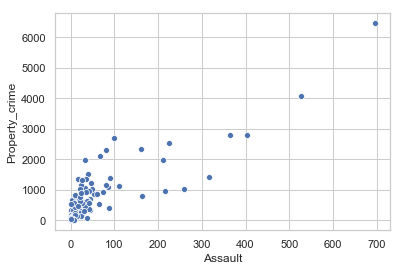

In [23]:
# scatter plot
sns.scatterplot(x=x['Assault'], y=y)

In [24]:
# find outliers in the 'assault' coulmn
assault_outliers = (x['Assault'].std() * 3) + x['Assault'].mean()
print((x['Assault'] > assault_outliers).sum())

print((x['Assault'] < -assault_outliers).sum())

8
0


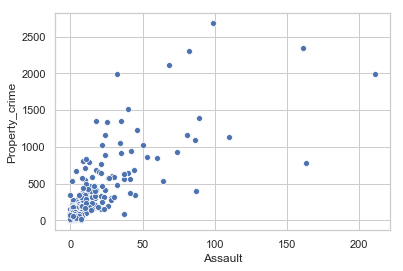

In [25]:
# remove outliers
df = df.drop(df[df.Assault > assault_outliers].index)
sns.scatterplot(x=df['Assault'], y=y)

In [27]:
# recreate the independent and dependent for the linear regression
x = df[['Population', 'Population_sqrd', 'Murder', 'Robbery', 'Assault']]
y = df['Property_crime']

# linear regression
regr = linear_model.LinearRegression()
regr.fit(x, y)

# r^2 value
print('\nR-squared\n', regr.score(x, y))


R-squared
 0.694224432608167
